# Chapitre 3 : Comprendre la régression linéaire et logistique avec scikit-learn 📊🧠

Dans ce cours, nous allons explorer les concepts fondamentaux de la régression linéaire et logistique en utilisant la bibliothèque scikit-learn. Nous verrons comment ces modèles peuvent être appliqués à des problèmes de prédiction et de classification.

N'hésite pas à lire ces ressources ✅

- [Documentation officielle de scikit-learn](https://scikit-learn.org/stable/documentation.html)
- [Guide de démarrage rapide scikit-learn](https://scikit-learn.org/stable/getting_started.html)
- [Tutoriel sur la régression linéaire](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)
- [Tutoriel sur la régression logistique](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)

Si tu as des questions ! 🙌🏼 Lance-toi !

Durant cette masterclasse et en prenant en compte les différents retours des masterclasses précédentes, nous allons travailler de la sorte:

- Comprendre un modèle de machine learning
- Découverte des concepts de régression linéaire et logistique
- Utilisation de scikit-learn pour implémenter ces modèles
- Application sur des jeux de données réels
- Visualisation des résultats avec Matplotlib et Seaborn

## 1. Le machine learning ? Kesako ? 🤔

Dans cette partie je vais vous expliquer ce qu'est le machine learning et comment ça fonctionne.
Le but étant de vous faire comprendre les concepts de base de ce domaine de l'intelligence artificielle.
- C'est quoi un modèle ?
- Comment l'entraîner ?
- Comment l'utiliser ?
- Comment évaluer la performance d'un modèle ?



### 1.1. Qu'est-ce qu'un modèle ? 🧮

```Un modèle est le résultat d’un algorithme qui apprend une fonction mathématique pour représenter la relation entre les variables d’un ensemble de données.```

C'est tout !

Parmi des modèles célèbres, on peut citer :
1. GPT (Generative Pretrained Transformer) 🤖
- **Description** : Modèle génératif basé sur les transformer, utilisé pour prédire le prochain mot dans une séquence et générer du texte.
- **Créateur** : OpenAI.
- **Lien** : [GPT-3 paper](https://arxiv.org/abs/2005.14165)

2. BERT (Bidirectional Encoder Representations from Transformers) 📖
- **Description** : Modèle de langage bidirectionnel pour comprendre le contexte des mots dans un texte, utilisé pour des tâches comme la compréhension de texte.
- **Créateur** : Google.
- **Lien** : [BERT paper](https://arxiv.org/abs/1810.04805)

3. Regression Linéaire 📈
- **Description** : Modèle de **régression** simple qui trouve la meilleure ligne droite pour prédire une variable continue à partir d’une ou plusieurs variables indépendantes.
- **Usage** : Utilisé pour des tâches de prédiction comme les ventes, le prix des maisons, etc.

4. Regression Logistique 🔢
- **Description** : Modèle de **classification** qui prédit des probabilités et classe les données dans deux catégories (binaire) ou plusieurs catégories (multinomial).
- **Usage** : Utilisé pour des tâches de classification comme la détection de spam, le diagnostic médical.

5. ResNet (Residual Networks) 🖼️
- **Description** : Réseau de neurones profond conçu pour la classification d'images, avec des connexions résiduelles pour faciliter l'entraînement.
- **Créateur** : Microsoft Research.
- **Lien** : [ResNet paper](https://arxiv.org/abs/1512.03385)

Dans les faits, après la phase **<span style="color: green;">d'apprentissage</span>**, c'est une **fonction** mathématique qui prend une **<span style="color: blue;">entrée</span>** et retourne une **<span style="color: red;">Sortie</span>**:

<div style="text-align: center;">
<img src="./image/basic.png" width="500" style="box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);border-radius: 10px;"/>
</div>

On appelle **entrée** les caractéristiques (**<span style="color: blue;">features</span>**) 📊 et **sortie** la cible (**<span style="color: red;">Target</span>**). 🎯


Dans d'autres termes les entrées sont les données que l'on va utiliser pour effectuer une prédiction  et possédant les mêmes caractéristiques que les données avec lesquelles nous avons <span style="color: green;">**construit (train)**</span> notre modèle et la sortie est le retour de la fonction avec nos données entrées.

Prenons l'éxemple du titanic que nous avons vu dans le cours 2.


<div style="text-align: center;">
<img src="./image/titanic_predict.png" width="600" style="box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);border-radius: 10px;"/>
</div>

Dans le cas du titanic, l'entrée est constituée des **<span style="color:blue;"> caractéristiques</span>** de la personne (âge, sexe, classe, etc...) et la **<span style="color:red;">sortie</span>** est la classe (probabilité) qui determine si la personne ai survécu.

Dans cet éxemple, notre **modèle**  serait cette fonction mathématique, <span style="color: green;">construite</span> avec les données que nous avons dans le dataset du titanic, c'est à dire nos données d'entrainement alias **<span style="color: blue;">features</span>** et nos sortie alias **<span style="color: red;">target</span>**.

De manière générale on nomme nos features **<span style="color: blue;">X</span>** et notre target **<span style="color: red;">y</span>**.



Dans cette introduction nous avons vu trois élèments très importants :
- **<span style="color: blue;">features</span>** >> Qui représente nos données avec lesquelles nous allons construire notre modèle.
- **<span style="color: red;">target</span>** >> Qui représente la sortie que nous souhaitons prédire.
- **<span style="color: green;">modèle</span>** >> Qui représente la fonction mathématique que nous allons construire avec les <span style="color: blue;">features</span> et la <span style="color: red;">target</span>.



### 1.2 Construire un modèle, supérvisé ? non supervisé ? 🧱

<!-- Dans les faits, la construction d'un modèle se fait en 3 étapes :
- **<span style="color: green;">Entrainement</span>** >> Qui consiste à construire le modèle en utilisant les features et le target.
- **<span style="color: purple;">Validation</span>** >> Qui consiste à évaluer la performance du modèle sur des données qui n'ont pas été utilisées pour l'entrainement.
- **<span style="color: brown;">Test</span>** >> Qui consiste à évaluer la performance du modèle sur des données qui n'ont pas été utilisées pour l'entrainement et la validation. -->
Pour construire un modèle, nous devons lui permettre d'apprendre quelques chose. Nous appelons cette phase la phase d'**<span style="color: green;">apprentissage</span>**.

Avant d'aller plus, loin. J'aimerais vous parler des deux grandes familles de modèles que vous rencontrez dans le machine learning. Les modèles **supervisés** et les modèles **non supervisés**.

Je vous ai parlé dans la partie precedente de la **<span style="color: red;">target</span>** . La **<span style="color: red;">target</span>** 🎯 est la valeur que nous souhaitons prédire. 

Prenons le schéma suivant: 
<div style="text-align: center;">
<img src="./image/basic_plus.png" width="800" style="box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);border-radius: 10px;"/>
</div>


1. Nous donnons à notre modèle des **<span style="color: blue;">features</span>** 📊. && Nous donnons à notre modèle une **<span style="color: red;">target</span>** 🎯.

2. Notre modèle va essayer d'apprendre la relation entre les **<span style="color: blue;">features</span>** 📊 et la **<span style="color: red;">target</span>** 🎯.

3. Une fois la phase d'**<span style="color: green;">apprentissage</span>** terminé, notre modèle peut être utilisé pour faire des prédictions.

⚠️
```Je vous ai menti, il arrive que nous ne connaissions pas cette target 🤷🏽‍♂️. ```

Il éxiste deux grandes catégories de modèles :
- Les modèles **supervisés**
- Les modèles **non supervisés**
  
Un petit éxemple de cette différence :

<div style="text-align: center;">
<img src="./image/supvsunsup.png" width="600" style="box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);border-radius: 10px;"/>
</div>
De l'image précèdente il faut retenir que :

- Les modèles supervisés sont des modèles qui sont entrainés avec une **<span style="color: red;">target</span>** 🎯.
- Les modèles non supervisés sont des modèles qui ne sont pas entrainés avec une **<span style="color: red;">target</span>** 🎯

Les défis pour les modèles supervisés sont de trouver la meilleure fonction mathématique qui représente la relation entre les **<span style="color: blue;">features</span>** 📊 et la **<span style="color: red;">target</span>** 🎯.
Les défis pour les modèles non supervisés sont de trouver des similarités entre les données.

Dans le cas du Titanic, nous avons une **<span style="color: red;">classe, une étiquette, une target 🎯, un y</span>** (j'ai plus de synonymes 😅). 
Vous-vous rappelez de la partie 2 ? Avec les données du titanic, nous avions un dataset avec des features et finalement une target. 
<div style="text-align: center;">
<img src="./image/survived.png" width="600" style="box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);border-radius: 10px;"/>
<figcaption>Supervised vs Unsupervised</figcaption>
</div>

**<span style="color: red;">Elle représente notre classe, celle qui indique si la personne a survécu au naufrage du Titanic ou non.</span>**

Si je souhaite prédire la probabilité que la personne ai survécu, je vais utiliser un modèle supervisé. Sachant que mes données sont déja étiquetté. 

Voila à quoi ressemble une phase d'entrainement d'un modèle **supérvisé** ici une regression logistique: 

<div style="text-align: center;">
<img src="./image/logistic.gif" width="600" style="box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);border-radius: 10px;"/>
<figcaption>Entrainement d'un modèle supervisé</figcaption>
</div>

Il faut souligner plusieurs points dans ce graphique:
- Le modèle essai de comprendre quelque chose 
- Il essai de séparer les données en deux catégories
- Il essai de trouver la meilleure ligne  pour séparer les deux catégories
- Il y a des **<span style="color: orange;">epochs</span>** ? 
- Il y a un **<span style="color: brown;">cost</span>** ? 

```On y reviendra très rapidement.```

Les modèles non supérvisés permettent de façon general d'effectuer des tâches de classification exploratoire. Par exemple une segmentation des données ou alors des groupements. 

Il faut retenir que ce type de modèle ne sont pas **<span style="color: green;">entrainés</span>** avec une **<span style="color: red;">target</span>** 🎯. Il cherche à trouver des similarités entre les données. 

<div style="text-align: center;">
<img src="./image/k_means.gif" width="500" style="box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);border-radius: 10px;"/>
<figcaption>Kmeans</figcaption>
</div>

Dans l'exemple précèdent, on peut voir que le modèle essai de regrouper les données en fonction de leur ressemblance. Le Kmeans va de façon générale regrouper les données en fonction de leur distance entre elles.
C'est un algorithme non supervisé. Il cherche à classifier les données en fonction de leur similarité. Car il ne connait pas les **<span style="color: red;">étiquettes (y) de ces données. 🎯</span>**

Ci dessous un tableau récapitulatif de la différence entre les modèles supervisés et non supervisés :


| Type d'apprentissage    | Cas d'utilisation préférés                              | Exemples d'algorithmes                   |
|-------------------------|:--------------------------------------------------------:|:------------------------------------------:|
| **Supervisé**            |  Prédiction de valeurs numériques (régression)        | Régression linéaire, Réseaux de neurones |
|                         |  Classification des emails (spam/nonspam)            | SVM, KNN, Régression logistique          |
|                         |  Prédiction de la maladie d'un patient                | Arbres de décision, Forêts aléatoires    |
|                         |  Reconnaissance faciale                               | Réseaux de neurones convolutionnels (CNN)|
|                         |  Détection de fraudes bancaires                       | Forêts aléatoires, SVM                   |
|                         |  Analyse des sentiments (positif/négatif)             | Réseaux de neurones, SVM                 |
|                         |  Prédiction de la demande de stock                    | Régression linéaire, Régression Ridge    |
| **Non supervisé**        |  Segmentation de clients en groupes                   | KMeans, DBSCAN                          |
|                         |  Détection d'anomalies dans les données               | Isolation Forest, Algorithmes de clustering |
|                         |  Réduction de la dimensionnalité des données          | PCA (Analyse en Composantes Principales) |
|                         |  Groupement des documents par thème                   | Modèles de clustering (KMeans)          |
|                         |  Compression d'image                                  | Autoencodeurs                            |
|                         |  Analyse de la structure d'une base de données        | Algorithmes de clustering, KMeans       |
|                         |  Identification de caractéristiques latentes          | Autoencodeurs, Réseaux de neurones       |


A ce stade, voici le vocabulaire de base que nous avons abordé :
- **<span style="color: blue;">features</span>** 📊 : Les caractéristiques de nos données.
- **<span style="color: red;">target</span>** 🎯 : La sortie que nous souhaitons prédire.
- **<span style="color: green;">modèle</span>** 🧮 : La fonction mathématique que nous allons construire avec les features et le target.
- **<span style="color: orange;">epochs</span>** 🔄 
- **<span style="color: brown;">cost</span>** 💰 

<div style="text-align: center;">
<img src="./image/firststep.png" width="400" style="box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);border-radius: 10px;"/>
<figcaption>Vocabulaire de base</figcaption>
</div>

## 2 Construire un modèle de régression linéaire par la pratique 📈

Dans cette partie nous allons construire un modèle de régression linéaire en utilisant scikit-learn.

Scikit-learn est une bibliothèque de machine learning en Python. Elle propose des implémentations de nombreux algorithmes de machine learning, y compris la régression linéaire.

Pour ce cas pratique nous allons utiliser le dataset suivant :
- Carprice dataset

### 2.1 Énoncé du problème 🕵🏼‍♀️

 
 Une entreprise automobile chinoise, Geely Auto, aspire à entrer sur le marché américain en établissant leur unité de fabrication sur place et en produisant des voitures localement pour concurrencer leurs homologues américains et européens.
 
 Ils ont fait appel à une société de conseil automobile pour comprendre les facteurs qui influencent le prix des voitures. Plus précisément, ils veulent comprendre les facteurs qui affectent le prix des voitures sur le marché américain, car ceux-ci peuvent être très différents du marché chinois. 
 
 L'entreprise souhaite répondre aux questions suivantes :

 - Quelles variables sont **significatives** pour expliquer le prix des voitures ?
 - Comment ces variables décrivent le prix des voitures ?

Nous allons voir ensemble l'ensemble des étapes nécessaires pour répondre à ces questions.

- Comment je dois manipuler ce dataset ? 📊
- Quelles sont les étapes nécessaires pour construire un modèle de régression linéaire ? 🛠️
- Comment évaluer la performance de ce modèle ? 📈
- Quand je dois m'arrêter durant la phase d'apprentissage ? 🛑
- Comment puis-je améliorer la performance de mon modèle ? ⚡

Nous essaierons de répondre à ces questions ensemble. 


2.2 Exploration du dataset 🔍

Comme pour la masterclass précédente, nous allons commencer par explorer le dataset.
Pour ce faire, rien de charger le dataset avec pandas et regarder les élèments qui le compose.

```python
import pandas as pd

df = pd.read_csv('./dataset/carprice.csv')
```

C'est partie 🤞🏼


In [20]:
# Désactivation des warnings
import warnings
warnings.filterwarnings('ignore')

#Importation des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

In [3]:
carprice_df = pd.read_csv('./dataset/carprice.csv')

# Affichage des 5 premières lignes du dataset
carprice_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


La première question que je dois me poser est de quoi est constitué ce dataset ?

Pour ce faire voici un petit récapitulatif des colonnes du dataset :
| N° | Nom de la variable              | Description                                                                                                 |
|----|----------------------------------|-------------------------------------------------------------------------------------------------------------|
| 1  | Car_ID                           | Identifiant unique de chaque observation (Entier)                                                           |
| 2  | Symboling                        | Indice de risque d'assurance assigné. Une valeur de +3 indique un risque élevé, -3 qu'il est probablement très sûr (Catégoriel) |
| 3  | CarName                       | Nom de la marque de la voiture (Catégoriel)                                                                 |
| 4  | fueltype                         | Type de carburant de la voiture, par exemple essence ou diesel (Catégoriel)                                 |
| 5  | aspiration                       | Type d'aspiration utilisé dans la voiture (Catégoriel)                                                      |
| 6  | doornumber                       | Nombre de portes de la voiture (Catégoriel)                                                                 |
| 7  | carbody                          | Type de carrosserie de la voiture (Catégoriel)                                                              |
| 8  | drivewheel                       | Type de roues motrices (Catégoriel)                                                                         |
| 9  | enginelocation                   | Emplacement du moteur dans la voiture (Catégoriel)                                                          |
| 10 | wheelbase                        | Empattement de la voiture (Numérique)                                                                       |
| 11 | carlength                        | Longueur de la voiture (Numérique)                                                                          |
| 12 | carwidth                         | Largeur de la voiture (Numérique)                                                                           |
| 13 | carheight                        | Hauteur de la voiture (Numérique)                                                                           |
| 14 | curbweight                       | Poids de la voiture sans passagers ni bagages (Numérique)                                                   |
| 15 | enginetype                       | Type de moteur (Catégoriel)                                                                                 |
| 16 | cylindernumber                   | Nombre de cylindres placés dans le moteur (Catégoriel)                                                      |
| 17 | enginesize                       | Taille du moteur (Numérique)                                                                                |
| 18 | fuelsystem                       | Système d'alimentation en carburant de la voiture (Catégoriel)                                              |
| 19 | boreratio                        | Rapport d'alésage de la voiture (Numérique)                                                                 |
| 20 | stroke                           | Course ou volume dans le moteur (Numérique)                                                                 |
| 21 | compressionratio                 | Rapport de compression du moteur (Numérique)                                                                |
| 22 | horsepower                       | Puissance du moteur (Numérique)                                                                             |
| 23 | peakrpm                          | Régime maximal du moteur (Numérique)                                                                        |
| 24 | citympg                          | Consommation de carburant en ville (Numérique)                                                              |
| 25 | highwaympg                       | Consommation de carburant sur autoroute (Numérique)                                                         |
| 26 | price (Variable dépendante)      | Prix de la voiture (Numérique)                                                                              |

**Source :** [https://archive.ics.uci.edu/ml/datasets/Automobile](https://archive.ics.uci.edu/ml/datasets/Automobile)

Par la suite nous allons vérifier la shape du dataset pour voir combien de ligne et de colonnes il contient.

```python
carprice_df.shape
```


In [4]:
carprice_df.shape

(205, 26)

205 lignes et 26 colonnes 💪🏼

Est-ce que j'ai des valeurs manquantes ?

```python
carprice_df.isnull().sum()
```

In [5]:
carprice_df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

C'est un dataset assez propre, il n'y a pas de valeurs manquantes.
Ce qui nous évite de faire de la gestion des valeurs manquantes. 😎

### 2.3 CarName ? 🧹
Cependant on peut remarquer que la colonne carName possède la marque de la voiture mais aussi le modèle de la voiture.
Il faudrait séparer ces deux informations.




In [6]:
carprice_df[['CarName']]

,CarName
0,alfa-romero giulia
1,alfa-romero stelvio
2,alfa-romero Quadrifoglio
3,audi 100 ls
4,audi 100ls
...,...
200,volvo 145e (sw)
201,volvo 144ea
202,volvo 244dl
203,volvo 246


Pour corriger ce problème, nous allons créer une nouvelle colonne qui sera la marque de la voiture et une autre qui sera le nom de la voiture.

```python
carprice_df['CarBrand'] = carprice_df['CarName'].apply(lambda x: x.split(' ')[0])
```

Ce que je fais dans le code précédent:
1. Je sélectionne la colonne CarName
2. Je sépare la chaîne de caractères en fonction des espaces et je prends la première valeur de mon tableau.

Maintenant je peux voir les marques de voiture qui sont présentes dans le dataset.

```python
carprice_df['CarBrand'].unique()
```

In [13]:
# Pour bien comprendre
separation = carprice_df['CarName'].iloc[0]
print(separation.split(' '))
# Si je prend la valeur 0 de mon tableau, je peux récupérer la marque de la voiture.
marque = separation.split(' ')[0]
print(marque)


['alfa-romero', 'giulia']
alfa-romero


Appliquons cette méthode à toutes les lignes de mon dataset.

In [14]:
carprice_df['CarBrand'] = carprice_df['CarName'].apply(lambda x: x.split(' ')[0])
carprice_df[['CarName', 'CarBrand']]

,CarName,CarBrand
0,alfa-romero giulia,alfa-romero
1,alfa-romero stelvio,alfa-romero
2,alfa-romero Quadrifoglio,alfa-romero
3,audi 100 ls,audi
4,audi 100ls,audi
...,...,...
200,volvo 145e (sw),volvo
201,volvo 144ea,volvo
202,volvo 244dl,volvo
203,volvo 246,volvo


Dans le cadre de ce cours et pour avoir une vision plus claire, je vais créer une fonction qui va me permettre d'ajouter cette colonne. 
Je vous éxpliquerais pourquoi dans un petit instant. 

In [15]:
def add_car_brand_column(data):
    data = data.copy()  # Pour éviter les modifications en place
    data['CarBrand'] = data['CarName'].apply(lambda x: x.split(' ')[0])
    return data

carprice_df = add_car_brand_column(carprice_df)
carprice_df[['CarName', 'CarBrand']]


,CarName,CarBrand
0,alfa-romero giulia,alfa-romero
1,alfa-romero stelvio,alfa-romero
2,alfa-romero Quadrifoglio,alfa-romero
3,audi 100 ls,audi
4,audi 100ls,audi
...,...,...
200,volvo 145e (sw),volvo
201,volvo 144ea,volvo
202,volvo 244dl,volvo
203,volvo 246,volvo


___
```Petite apparté``` >>> Nous allons parler des pipelines. 

Quand il s’agit de projets de machine learning ou de deep learning, il est très courant d’effectuer de nombreuses transformations sur les données. Il peut être facile de s’y perdre.

Les pipelines permettent de regrouper un ensemble de transformations qui seront appliquées aux données de manière structurée.

Cela permet non seulement de gagner du temps, mais également de rendre le code plus lisible et plus facile à maintenir.

Et surtout, cela permet d’organiser le processus de manière logique et de mieux structurer notre progression vers la solution.

Un pipeline ressemble à ceci :

<div style="text-align: center;">
<img src="./image/pipeline.png" width="300" style="box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);border-radius: 10px;"/>
</div>

Cela peut sembler compliqué au début, mais vous verrez, c’est très simple. Le concept est le suivant : on définit un ensemble de transformations que l’on souhaite appliquer aux données, puis on les ajoute au pipeline.

On peut ensuite visualiser le pipeline pour avoir une vue d’ensemble des transformations appliquées.

C’est une bonne pratique ! Dans le cas d’un modèle en production, c’est même primordial, car cela permet d’identifier rapidement les étapes de transformation de nos données et d’appliquer systématiquement l’ensemble des transformations chaque fois que l’on construit le modèle. 

Pour créer une pipeline et la visualiser sur notre fonction add_car_brand_column, nous allons utiliser la librairie `sklearn_pipeline_visualizer`.


```python
from sklearn_pipeline_visualizer import visualize_pipeline
```
Ensuite nous allons créer notre pipeline.

```python
pipeline = Pipeline([
    ('add_car_brand_column', FunctionTransformer(add_car_brand_column))
])
```
Et pour la visualiser : 

```python
visualize_pipeline(pipeline)
```



In [24]:
pipeline = Pipeline([
    ('extract_car_brand', FunctionTransformer(add_car_brand_column, validate=False))
])
set_config(display='diagram')
pipeline

Pipeline(steps=[('extract_car_brand',
                 FunctionTransformer(func=<function add_car_brand_column at 0x11d3ff240>))])

```Mise an pratique de ma pipeline sur un nouveau dataset carprice```


In [25]:
testCar_df= pd.read_csv('./dataset/carprice.csv')
testCar_df = pipeline.fit_transform(testCar_df)
testCar_df[['CarName', 'CarBrand']]


,CarName,CarBrand
0,alfa-romero giulia,alfa-romero
1,alfa-romero stelvio,alfa-romero
2,alfa-romero Quadrifoglio,alfa-romero
3,audi 100 ls,audi
4,audi 100ls,audi
...,...,...
200,volvo 145e (sw),volvo
201,volvo 144ea,volvo
202,volvo 244dl,volvo
203,volvo 246,volvo


Vous imaginez bien que cela rend nos différentes étapes de transformation plus lisibles. 

Surtout et c'est un point très important, lorsque l'analyse et que l'ensemble des étapes sont dans notre pipeline, nous pouvons l'exporter sous format pickle. 

```python
import pickle

pickle.dump(pipeline, open('./model/pipeline.pkl', 'wb'))
```
Et par la suite nous pourrons le charger et l'utiliser pour l'appliquer à un dataset de production possédant les mêmes caractéristiques. 

```python
pipeline = pickle.load(open('./model/pipeline.pkl', 'rb'))
```

Nous n'irons pas jusque là dans ce cours mais c'est un point très important à savoir.

Voici un lien qui pourrait vous intéresser 🏃🏽‍♂️:
-  [Utilisation de pickle 🥒](https://saturncloud.io/blog/sklearn-how-to-save-a-model-created-from-a-pipeline-and-gridsearchcv-using-joblib-or-pickle/)

___

Maintenant que nous avons séparer la marque de la voiture et le modèle de la voiture, nous allons juste vérifier qu'il n'y a pas de marques avec des fautes d'orthographe.

```python
carprice_df['CarBrand'].unique()
```

In [27]:
carprice_df['CarBrand'].unique()


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

🤔 ...

Bon, on peut voir que nous avons des marques avec des fautes d'orthographe. 

| Nom dataset | Correction |
|--------------|------------|
| maxda        | mazda     |
| Nissan       | nissan    |
| porcshce      | porsche   |
| toyouta       | toyota    |
| vokswagen/vw    | volkswagen |

On remarque plusieurs soucis :
- Il y a des majuscules/minuscules
- Il y a des fautes d'orthographe

Il faut corriger ces problèmes. 

Nous allons créer une fonction qui va nous permettre de corriger ces problèmes.

```python
def correct_car_brand(data):
    data = data.copy()
    data['CarBrand'] = data['CarBrand'].apply(lambda x: x.lower())
    return data
```

Par la suite et en fonction de notre tableau de correspondance, nous devons renommer certaines marques dans une fonction.

```python
def rename_car_brand(data):
    data = data.copy()
    data['CarBrand'] = data['CarBrand'].replace({'maxda': 'mazda', 'Nissan': 'nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 'vokswagen': 'volkswagen', 'vw': 'volkswagen'})
    return data
```


In [28]:
def rename_car_brand(data):
    data = data.copy()
    data['CarBrand'] = data['CarBrand'].replace({'maxda': 'mazda', 'Nissan': 'nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 'vokswagen': 'volkswagen', 'vw': 'volkswagen'})
    return data

def correct_car_brand(data):
    data = data.copy()
    data['CarBrand'] = data['CarBrand'].apply(lambda x: x.lower())
    return data

pipeline = Pipeline([
    ('extract_car_brand', FunctionTransformer(add_car_brand_column, validate=False)),
    ('correct_car_brand', FunctionTransformer(correct_car_brand, validate=False)),
    ('rename_car_brand', FunctionTransformer(rename_car_brand, validate=False))
])
set_config(display='diagram')
pipeline

Pipeline(steps=[('extract_car_brand',
                 FunctionTransformer(func=<function add_car_brand_column at 0x11d3ff240>)),
                ('correct_car_brand',
                 FunctionTransformer(func=<function correct_car_brand at 0x12629b100>)),
                ('rename_car_brand',
                 FunctionTransformer(func=<function rename_car_brand at 0x12629b1a0>))])

In [31]:
carprice_df = pipeline.fit_transform(carprice_df)
carprice_df['CarBrand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [36]:
#Vérification
carprice_df[['CarBrand']].value_counts().sum()

np.int64(205)

Dans cette partie nous avons corrigé les fautes d'orthographe et de majuscules/minuscules.
Nous avons aussi compris l'importance d'une pipeline.

Nous allons maintenant éxplorer **visuellement** les données pour voir si nous pouvons en tirer des informations.

### 2.4 Analyse visuelle des données 📊

N'oublions pas notre problèmatique :
- Quelles variables sont **significatives** pour expliquer le prix des voitures ?
- Comment ces variables décrivent le prix des voitures ?

Nous allons commencer par regarder la distribution du prix des voitures et vérifier si nous n'avons pas d'outliers.

Pour ce faire nous allons utiliser un histogramme ainsi qu'un boxplot.


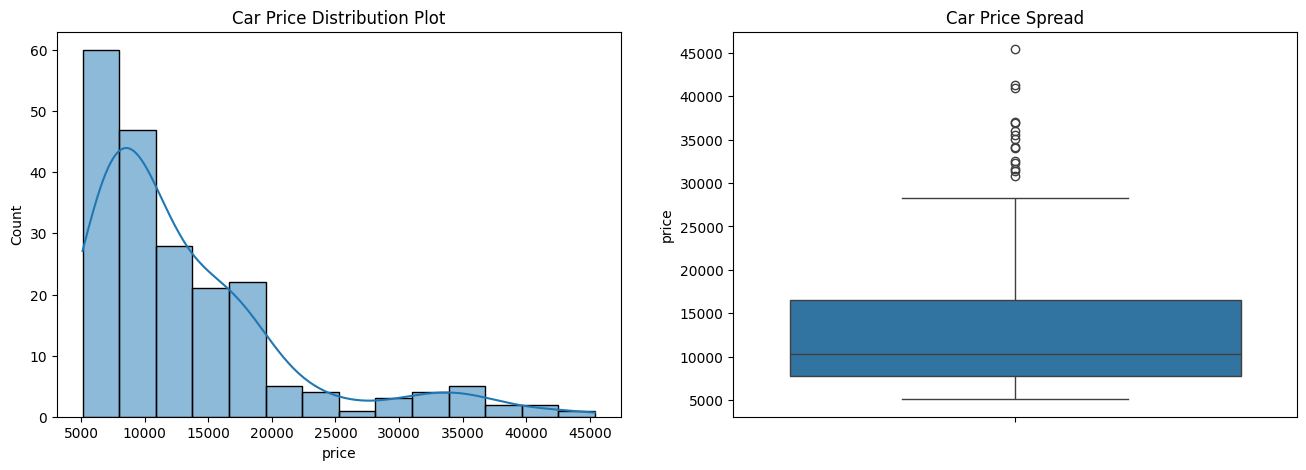

In [43]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.histplot(carprice_df.price, kde=True)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(carprice_df.price)

plt.show()

In [39]:
print(carprice_df.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))


count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


📊 Observations sur les statistiques :
- 🚨 Présence d'outliers dans les données
- 📈 Distribution asymétrique de l'histogramme
- ❌ Ne suit pas une loi normale



___
```Petite apparté```

Nous allons créer des données pour illustrer les différentes distributions.
Et comprendre l'importance de la normalité des données.

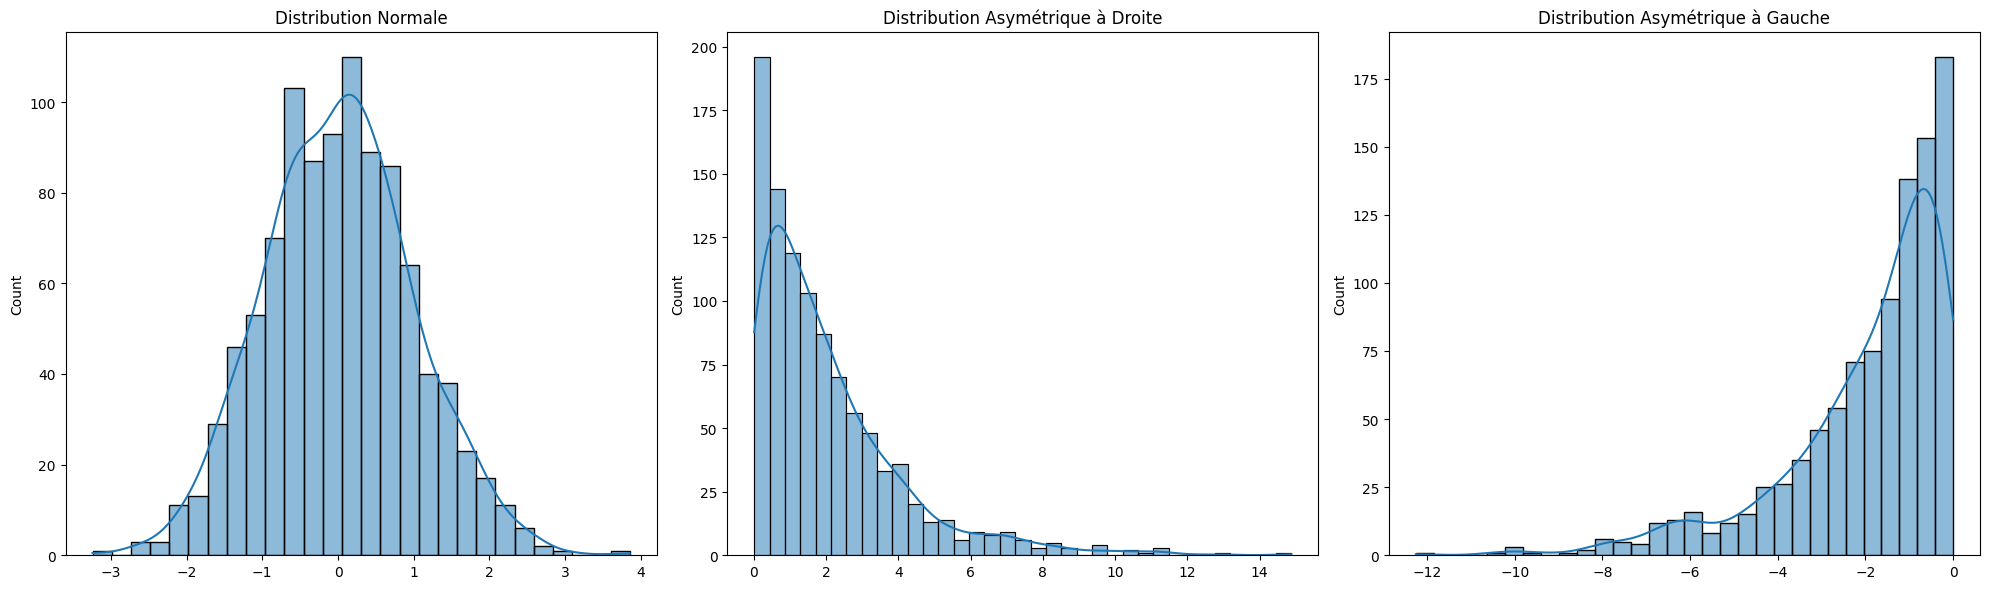

In [41]:
# Création de données pour illustrer les différentes distributions
np.random.seed(42)

plt.figure(figsize=(20,6))

# Distribution normale
plt.subplot(1,3,1)
normal_data = np.random.normal(0, 1, 1000)
plt.title('Distribution Normale')
sns.histplot(normal_data, kde=True)

# Distribution asymétrique à droite (skewed right)
plt.subplot(1,3,2)
skewed_right = np.random.exponential(2, 1000)
plt.title('Distribution Asymétrique à Droite')
sns.histplot(skewed_right, kde=True)

# Distribution asymétrique à gauche (skewed left)
plt.subplot(1,3,3)
skewed_left = -np.random.exponential(2, 1000)
plt.title('Distribution Asymétrique à Gauche')
sns.histplot(skewed_left, kde=True)

plt.tight_layout()
plt.show()


Dans les 3 graphiques précedent, nous pouvons voir que la distribution une suit une loi normale, alors que les deux autres ne la suivent pas.

Il est important de comprendre que la normalité des données est essentielle pour de nombreux algorithmes de machine learning.
En effet, de nombreux algorithmes supposent que les données sont distribuées normalement.

Si les données ne sont pas normalement distribuées, cela peut affecter les performances du modèle et la qualité des résultats.

Nous allons juste partir de ce postulat, mais si le sujet vous interesse vous pouvez vous rendre sur ce lien pour comprendre l'importance de la normalité des données.

- [Une distribution Normale 🔍](https://medium.com/analytics-vidhya/normal-distribution-and-machine-learning-ec9d3ca05070)

Il éxiste plusieurs méthodes pour normaliser les données.
- Box Cox
- Logarithme
- Racine carrée

Nous verrons cela un peu plus tard.
___


Nous allons chercher à voir si des variables sont significatives pour expliquer le prix des voitures.

Dans un premier temps nous allons analyser les variables catégorielles. 

```python
carprice_df.select_dtypes(include=['object']).columns
```

In [51]:
# Analyse des variables catégorielles
carprice_df.select_dtypes(include=['object']).columns


Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'CarBrand'],
      dtype='object')

Nous avons 11 variables catégorielles.

Nous allons commencer par analyser la variable ```CarBrand```.

```python
carprice_df['CarBrand'].value_counts()
```

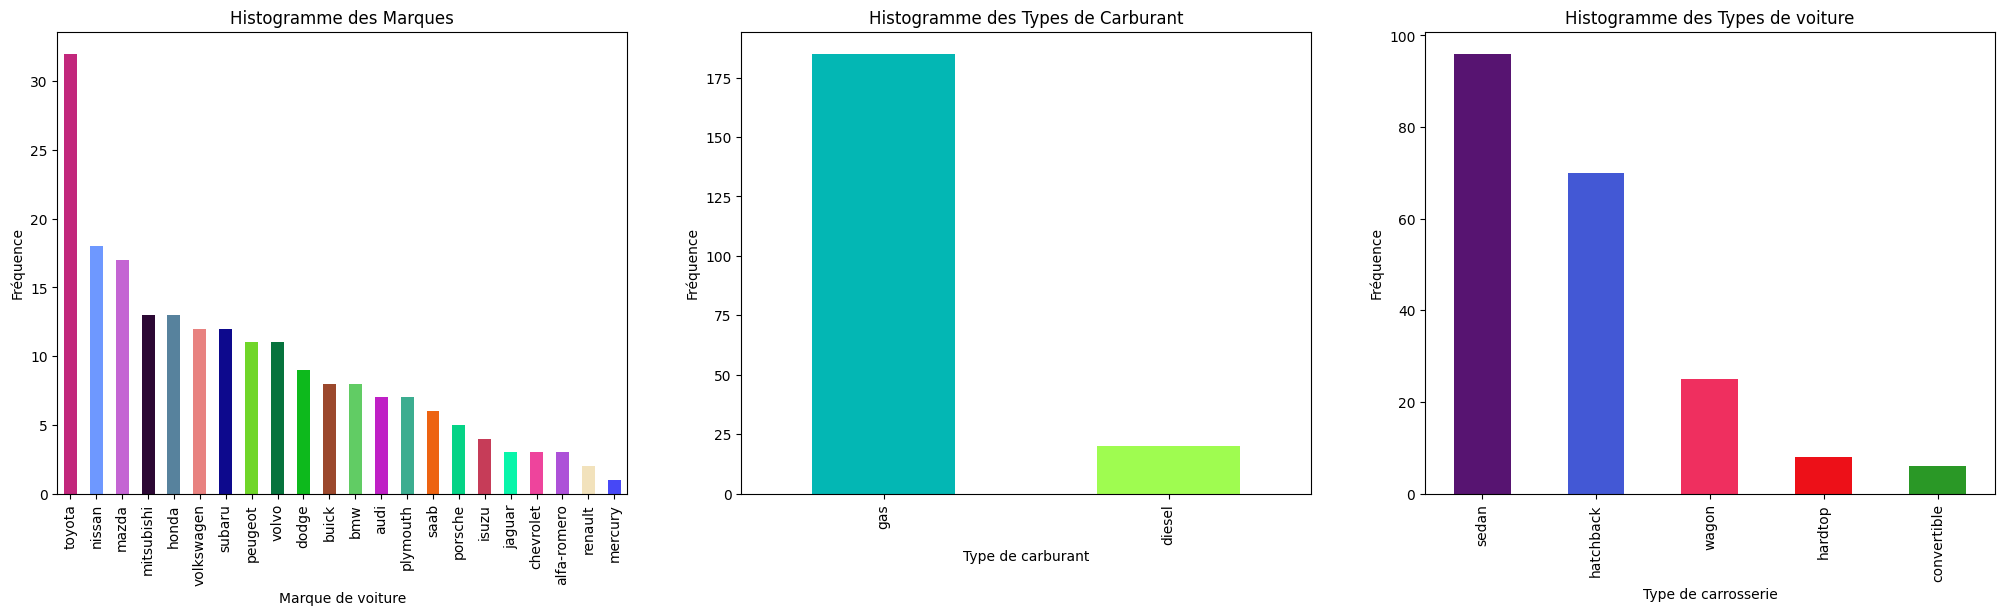

In [70]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = carprice_df.CarBrand.value_counts().plot(kind='bar', color=np.random.rand(len(carprice_df.CarBrand.unique()),3))
plt.title('Histogramme des Marques')
plt1.set(xlabel = 'Marque de voiture', ylabel='Fréquence')

plt.subplot(1,3,2)
plt1 = carprice_df.fueltype.value_counts().plot(kind='bar', color=np.random.rand(len(carprice_df.fueltype.unique()),3))
plt.title('Histogramme des Types de Carburant')
plt1.set(xlabel = 'Type de carburant', ylabel='Fréquence')

plt.subplot(1,3,3)
plt1 = carprice_df.carbody.value_counts().plot(kind='bar', color=np.random.rand(len(carprice_df.carbody.unique()),3))
plt.title('Histogramme des Types de voiture')
plt1.set(xlabel = 'Type de carrosserie', ylabel='Fréquence')

plt.show()

💡 Déduction : 
- Les marques de voiture les plus présentes sont ```nissan``` et ```toyota```. 🚗
- La plupart des voitures sont essence. ⛽️
- La plupart des voitures sont de type ```sedan```. (4 portes pour les passagers) 🚪



Est ce que le prix des voitures est lié au type de carrosserie ? Ou encore à la marque de la voiture ? Ou alors au type de carburant ?

Nous allons regarder les corrélations entre les variables catégorielles et le prix des voitures.

<Figure size 2500x600 with 0 Axes>

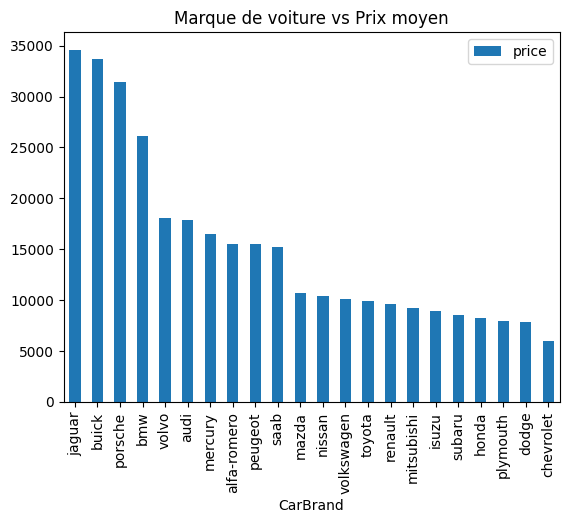

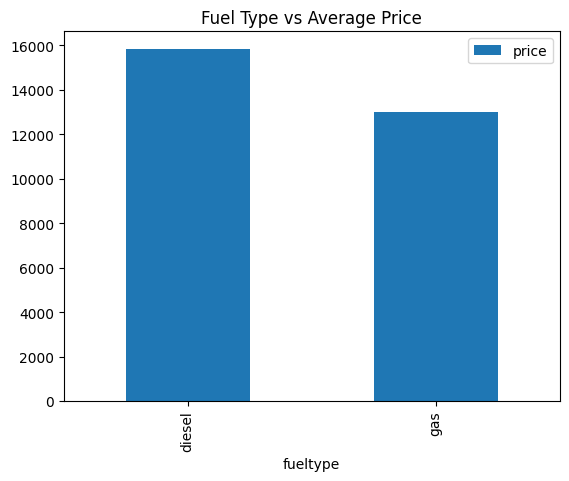

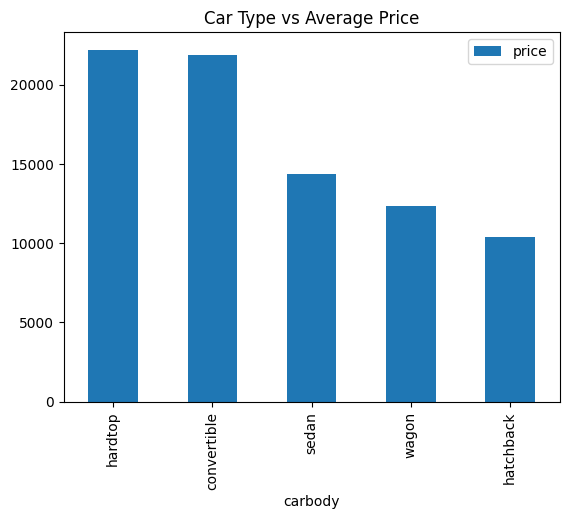

In [69]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(carprice_df.groupby(['CarBrand'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Marque de voiture vs Prix moyen')
plt.show()

df = pd.DataFrame(carprice_df.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(carprice_df.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()



💡 Déduction : 
- On peut déja en déduire que les voitures de type ```hatchback``` et ```convertible``` sont plus chères que les voitures de type ```sedan```.

- Que les voitures diesel sont plus chères que les voitures essence.

- Que la marque ```jaguar``` est la plus chère.

Et pour les autres variables catégorielles, nous allons faire un histogramme et un boxplot.

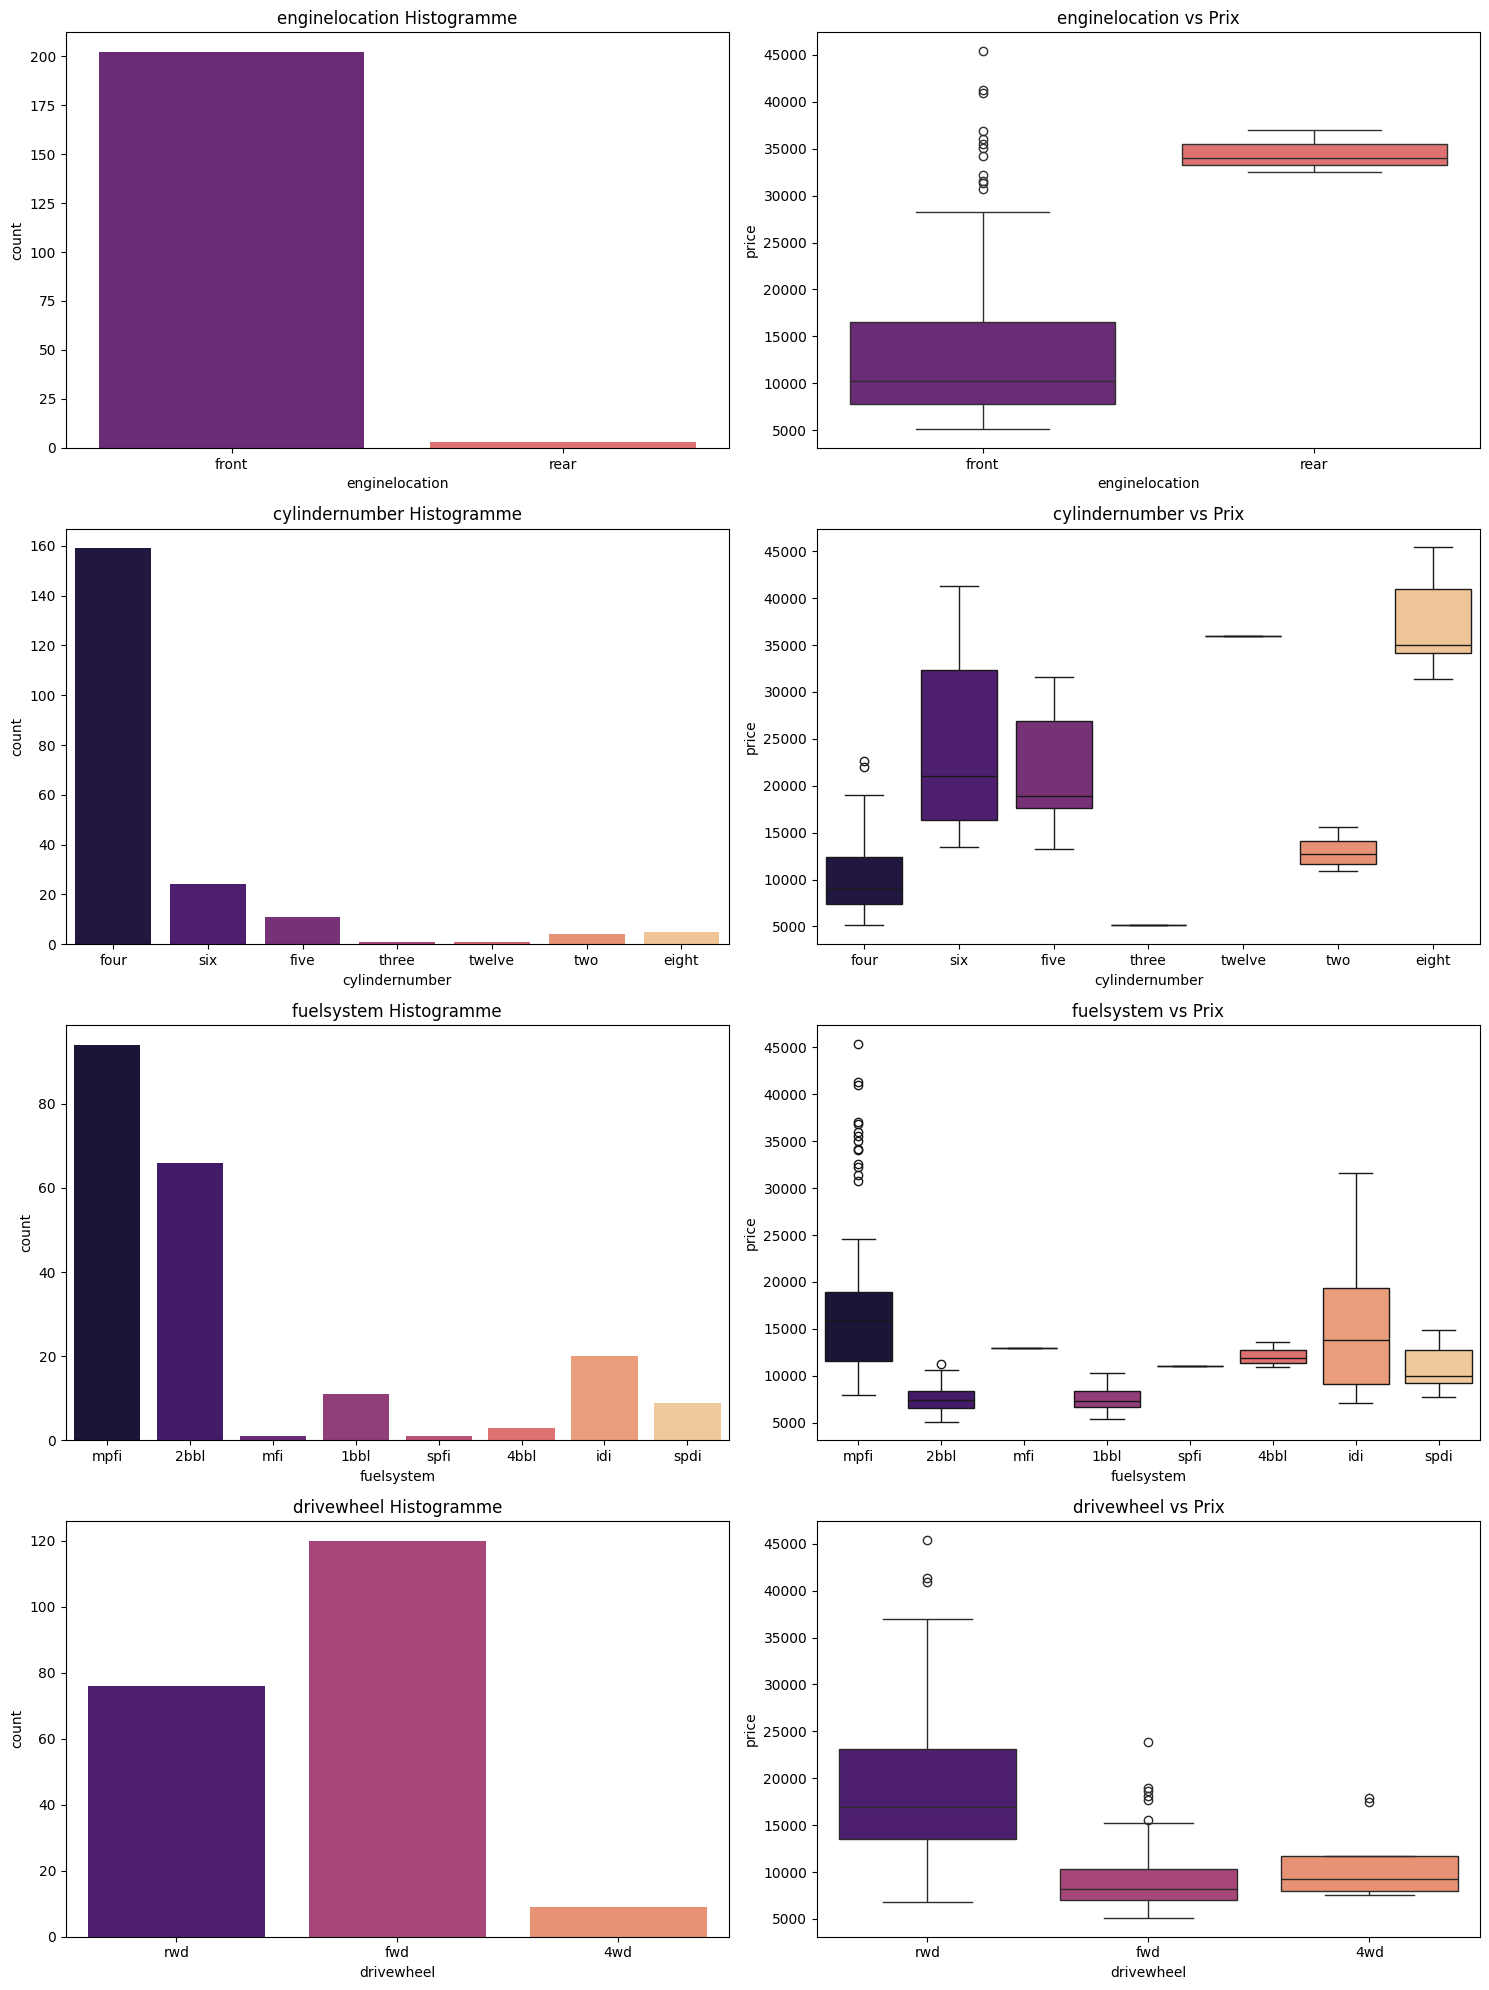

In [77]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogramme')
    sns.countplot(x=carprice_df[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Prix')
    sns.boxplot(x=carprice_df[x], y=carprice_df.price, palette=("magma"))

plt.figure(figsize=(15,20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()



💡 Déduction :
- Très peu de points de données pour les catégories enginelocation pour en tirer une conclusion.
- Le nombre de cylindres le plus courant est quatre, six et cinq. Cependant, les huit cylindres ont la gamme de prix la plus élevée.
- mpfi et 2bbl sont les types de systèmes de carburant les plus courants. mpfi et idi ayant la gamme de prix la plus élevée. Mais il y a peu de données pour les autres catégories pour en tirer une conclusion significative.
- Une différence très significative dans la catégorie drivewheel. La plupart des voitures haut de gamme semblent préférer la transmission rwd.
